In [3]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.ops import unary_union
import matplotlib.pyplot as plt
%matplotlib inline

In [184]:
df = pd.read_csv('data/data.csv')

In [185]:
df.head()

,district,Total Calls,Emergency Calls,Road Accidents,Medical,Fire,Building Collapse,Crime Incidents,Drowning,Explosion,Misc,Fake Calls,Patients Rescued
0,Lahore,19008571,1024477,474873,438171,29943,1429,25472,984,409,53196,1755,1014268
1,Rawalpindi,6847824,176946,73761,78969,7718,145,5466,216,142,10529,155,191363
2,Faisalabad,9172915,519353,200160,233372,12832,1324,26946,702,130,43887,214,543478
3,Multan,6318038,376382,123717,215388,7231,303,10313,305,57,19068,174,421227
4,Gujranwala,6740694,316323,126572,137369,7602,467,11893,585,256,31579,336,319947


In [287]:
dfg = gpd.read_file('data/punjab_districts(area_pop_den).geojson')

In [288]:
dfg.head()

,province,division,district,area,population,density,geometry
0,Punjab,Bahawalpur,Bahawalnagar,8878,2981919,336,"POLYGON ((72.78970 28.96686, 72.78582 28.96537..."
1,Punjab,Bahawalpur,Bahawalpur,24830,3668106,148,"POLYGON ((71.89630 27.95684, 71.89311 27.95511..."
2,Punjab,Bahawalpur,Rahim Yar Khan,11880,4814006,405,"POLYGON ((71.12506 27.79225, 71.08701 27.77679..."
3,Punjab,Dera Ghazi Khan,Dera Ghazi Khan,11922,2872201,241,"POLYGON ((70.80437 30.66216, 70.79614 30.63932..."
4,Punjab,Dera Ghazi Khan,Layyah,6291,1824230,290,"POLYGON ((71.75097 31.15443, 71.76996 31.11098..."


In [190]:
print('Length of district (dfg):', len(dfg.district))
print('Length of district (df):', len(df.district))

Length of district (dfg): 34
Length of district (df): 38


In [219]:
s1 = pd.DataFrame(data=df.district)
s1 = s1.sort_values('district')
s1.reset_index(drop=True, inplace=True)

s2 = pd.DataFrame(data=dfg.district)
s2 = s2.sort_values('district')
s2.reset_index(drop=True, inplace=True)

st = pd.concat([s1,s2], axis=1)
st.columns = ['district1','district2']
st[st.district1 != 'total' ]

,district1,district2
0,attock,attock
1,bahawalnagar,bahawalnagar
2,bahawalpur,bahawalpur
3,bhakkar,bhakkar
4,chakwal,chakwal
5,chiniot,dera ghazi khan
6,dera ghazi khan,faisalabad
7,faisalabad,gujranwala
8,gujranwala,gujrat
9,gujrat,hafizabad


In [199]:
df.loc[df['district'].str.contains('Der')]

,district,Total Calls,Emergency Calls,Road Accidents,Medical,Fire,Building Collapse,Crime Incidents,Drowning,Explosion,Misc,Fake Calls,Patients Rescued
7,Dera Ghazi Khan,4377428,217013,46274,131740,2992,369,7550,402,51,27635,47,254947


In [198]:
df.iloc[7,0] = 'Dera Ghazi Khan'

In [221]:
dfg.sort_values('district', inplace=True)
dfg.reset_index(drop=True, inplace=True)
dfg

,province,division,district,area,population,density,geometry
0,Punjab,Rawalpindi,attock,6858,1883556,275,"POLYGON ((72.02898 33.70902, 72.04382 33.73049..."
1,Punjab,Bahawalpur,bahawalnagar,8878,2981919,336,"POLYGON ((72.78970 28.96686, 72.78582 28.96537..."
2,Punjab,Bahawalpur,bahawalpur,24830,3668106,148,"POLYGON ((71.89630 27.95684, 71.89311 27.95511..."
3,Punjab,Sargodha,bhakkar,8153,1650518,202,"POLYGON ((71.75097 31.15443, 71.74628 31.16425..."
4,Punjab,Rawalpindi,chakwal,6524,1495982,229,"POLYGON ((71.90461 32.55104, 71.89904 32.55576..."
5,Punjab,Dera Ghazi Khan,dera ghazi khan,11922,2872201,241,"POLYGON ((70.80437 30.66216, 70.79614 30.63932..."
6,Punjab,Faisalabad,faisalabad,5856,7873910,1345,"POLYGON ((73.34368 31.01162, 73.34400 31.00571..."
7,Punjab,Gujranwala,gujranwala,3622,5014196,1384,"POLYGON ((73.79638 31.95671, 73.79937 31.97066..."
8,Punjab,Gujranwala,gujrat,3192,2756110,863,"POLYGON ((73.68703 32.35255, 73.65943 32.34317..."
9,Punjab,Gujranwala,hafizabad,2367,1156957,489,"POLYGON ((73.13525 31.86819, 73.15004 31.87774..."


In [222]:
df[~df['district'].isin(dfg.district)]


,district,Total Calls,Emergency Calls,Road Accidents,Medical,Fire,Building Collapse,Crime Incidents,Drowning,Explosion,Misc,Fake Calls,Patients Rescued
5,chiniot,890359,45466,22180,15762,919,129,1933,113,5,4425,1,61078
19,m.b. din,1284906,44920,19302,16677,1173,98,1927,321,7,5415,1,61935
22,murree,1823830,47763,6360,32875,663,22,471,63,3,7306,48,53380
36,total,115551648,5346350,1924279,2611911,116230,7600,185153,10035,1499,489643,4061,6083158


In [223]:
df_merged = dfg.merge(df, how='left', on='district')
df_merged

,province,division,district,area,population,density,geometry,Total Calls,Emergency Calls,Road Accidents,Medical,Fire,Building Collapse,Crime Incidents,Drowning,Explosion,Misc,Fake Calls,Patients Rescued
0,Punjab,Rawalpindi,attock,6858,1883556,275,"POLYGON ((72.02898 33.70902, 72.04382 33.73049...",941995,67037,12874,43336,964,72,1405,212,24,8150,47,71128
1,Punjab,Bahawalpur,bahawalnagar,8878,2981919,336,"POLYGON ((72.78970 28.96686, 72.78582 28.96537...",1831232,82421,21933,45916,1294,115,3349,131,20,9663,102,84565
2,Punjab,Bahawalpur,bahawalpur,24830,3668106,148,"POLYGON ((71.89630 27.95684, 71.89311 27.95511...",5087302,211585,61673,116607,3027,57,5698,318,19,24186,267,214437
3,Punjab,Sargodha,bhakkar,8153,1650518,202,"POLYGON ((71.75097 31.15443, 71.74628 31.16425...",1179783,57588,12733,32680,862,86,1801,118,7,9301,71,63347
4,Punjab,Rawalpindi,chakwal,6524,1495982,229,"POLYGON ((71.90461 32.55104, 71.89904 32.55576...",1502332,30391,12282,12256,802,22,859,87,6,4077,20,32921
5,Punjab,Dera Ghazi Khan,dera ghazi khan,11922,2872201,241,"POLYGON ((70.80437 30.66216, 70.79614 30.63932...",4377428,217013,46274,131740,2992,369,7550,402,51,27635,47,254947
6,Punjab,Faisalabad,faisalabad,5856,7873910,1345,"POLYGON ((73.34368 31.01162, 73.34400 31.00571...",9172915,519353,200160,233372,12832,1324,26946,702,130,43887,214,543478
7,Punjab,Gujranwala,gujranwala,3622,5014196,1384,"POLYGON ((73.79638 31.95671, 73.79937 31.97066...",6740694,316323,126572,137369,7602,467,11893,585,256,31579,336,319947
8,Punjab,Gujranwala,gujrat,3192,2756110,863,"POLYGON ((73.68703 32.35255, 73.65943 32.34317...",1600406,66122,34505,20931,1686,103,2125,315,20,6437,34,86850
9,Punjab,Gujranwala,hafizabad,2367,1156957,489,"POLYGON ((73.13525 31.86819, 73.15004 31.87774...",1080350,55716,21606,23896,1731,146,2252,240,12,5833,8,86076


In [ ]:
"""
Does not contain the following districts,
Chiniot, Mandi baha uddin
"""

In [234]:
li = list(df_merged.district)

/home/drogon/.local/lib/python3.6/site-packages/geopandas/plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
/home/drogon/.local/lib/python3.6/site-packages/geopandas/plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
/home/drogon/.local/lib/python3.6/site-packages/geopandas/plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until expli

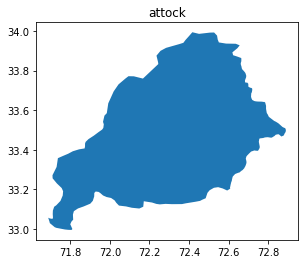

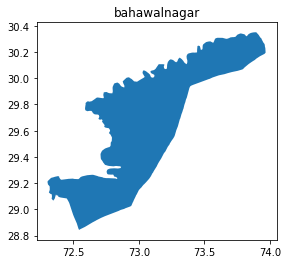

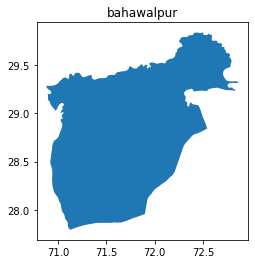

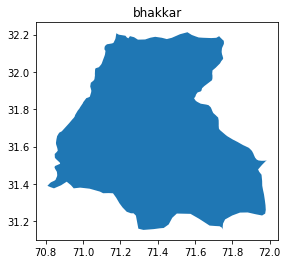

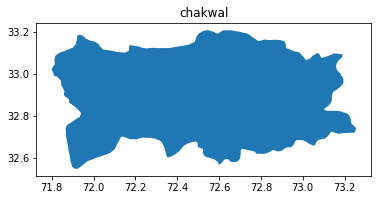

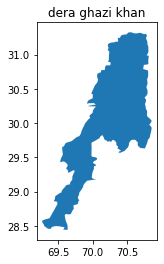

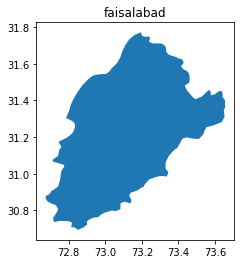

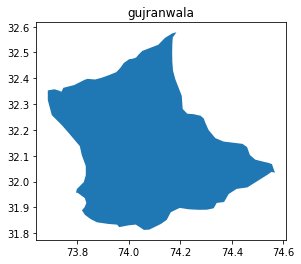

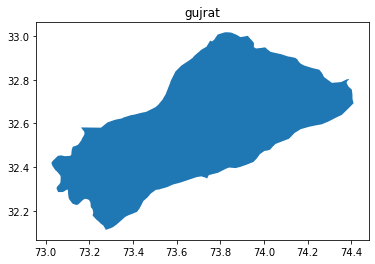

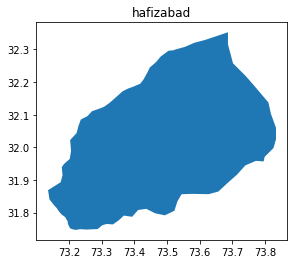

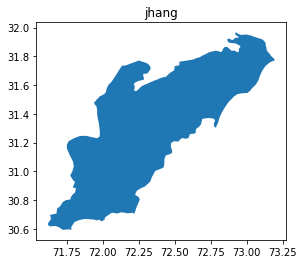

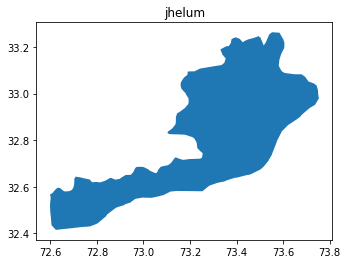

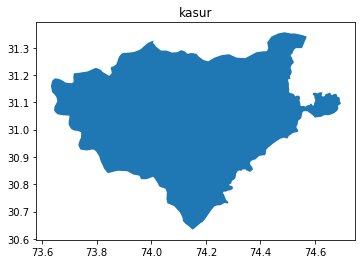

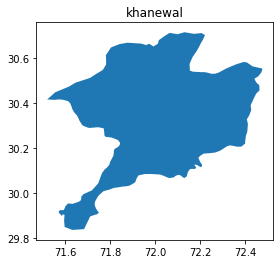

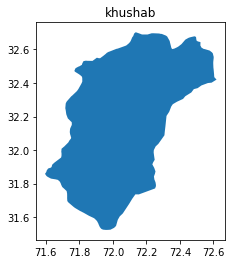

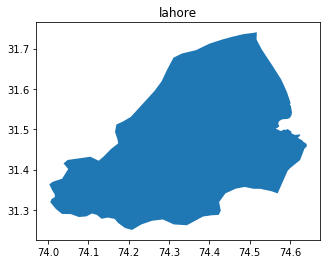

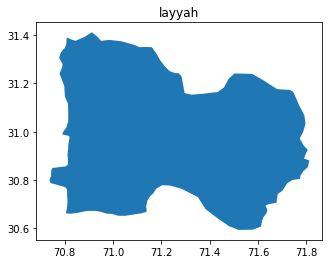

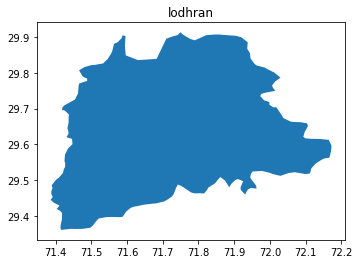

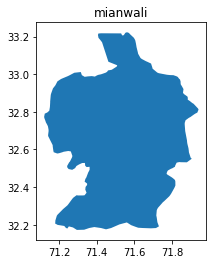

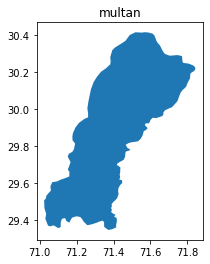

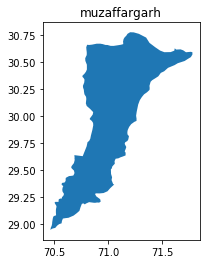

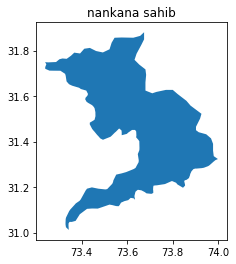

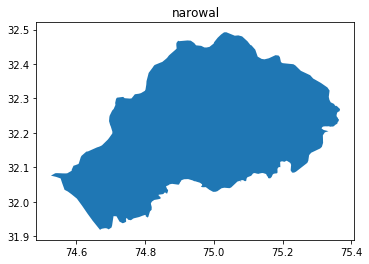

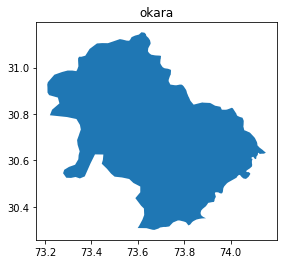

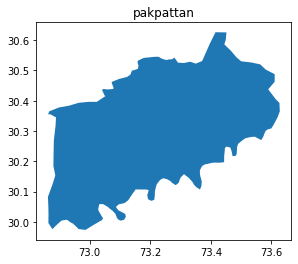

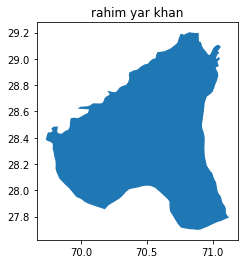

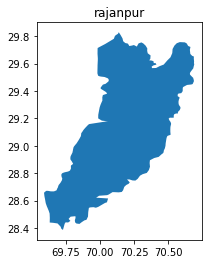

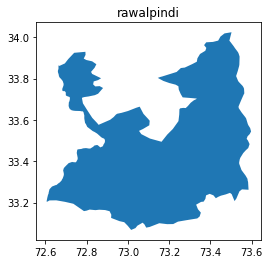

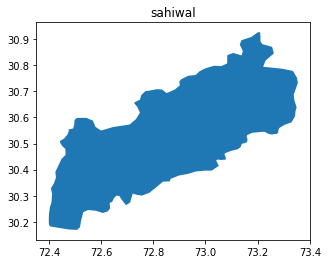

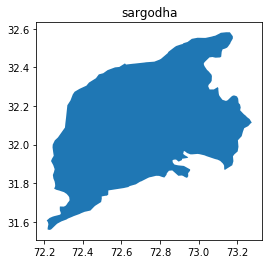

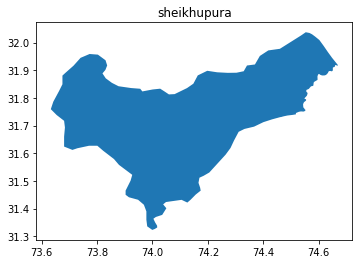

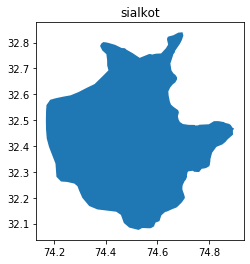

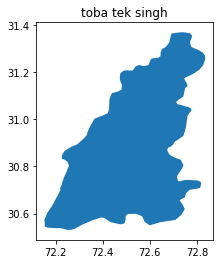

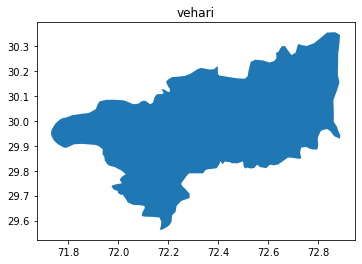

In [237]:
district = 'sahiwal'
for district in li:
    df_merged[df_merged['district'].str.contains(district)]['geometry'].plot()
#     print(row)
#     row['geometry'].plot()
    plt.title(district)

In [238]:
type(df_merged)

geopandas.geodataframe.GeoDataFrame

In [239]:
df_merged.to_csv('punjab_data_final.csv', index=False)
df_merged.to_file('punjab_data_final.geojson', driver='GeoJSON')

In [286]:
test = gpd.read_file('data/punjab_data_final.geojson')
test.head()

,province,division,district,area,population,density,Total Calls,Emergency Calls,Road Accidents,Medical,Fire,Building Collapse,Crime Incidents,Drowning,Explosion,Misc,Fake Calls,Patients Rescued,geometry
0,Punjab,Rawalpindi,attock,6858,1883556,275,941995,67037,12874,43336,964,72,1405,212,24,8150,47,71128,"POLYGON ((72.02898 33.70902, 72.04382 33.73049..."
1,Punjab,Bahawalpur,bahawalnagar,8878,2981919,336,1831232,82421,21933,45916,1294,115,3349,131,20,9663,102,84565,"POLYGON ((72.78970 28.96686, 72.78582 28.96537..."
2,Punjab,Bahawalpur,bahawalpur,24830,3668106,148,5087302,211585,61673,116607,3027,57,5698,318,19,24186,267,214437,"POLYGON ((71.89630 27.95684, 71.89311 27.95511..."
3,Punjab,Sargodha,bhakkar,8153,1650518,202,1179783,57588,12733,32680,862,86,1801,118,7,9301,71,63347,"POLYGON ((71.75097 31.15443, 71.74628 31.16425..."
4,Punjab,Rawalpindi,chakwal,6524,1495982,229,1502332,30391,12282,12256,802,22,859,87,6,4077,20,32921,"POLYGON ((71.90461 32.55104, 71.89904 32.55576..."


In [258]:
district = 'sahiwal'
t = test[test['district'].str.contains(district)].index.to_list()
test.loc[t]

,province,division,district,area,population,density,Total Calls,Emergency Calls,Road Accidents,Medical,Fire,Building Collapse,Crime Incidents,Drowning,Explosion,Misc,Fake Calls,Patients Rescued,geometry
28,Punjab,Sahiwal,sahiwal,3201,2517560,786,3934172,191363,61849,97110,2941,233,9283,458,18,19471,74,216734,"POLYGON ((72.86282 30.35496, 72.83678 30.35391..."


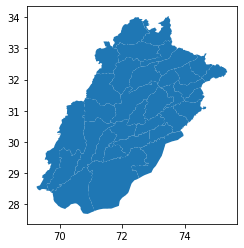

In [274]:
test['geometry'].plot()

In [285]:
division = 'Sahiwal'
l = list(test[test['division']==division]['district'])
[x.title() for x in l]

['Okara', 'Pakpattan', 'Sahiwal']